In [ ]:
# =========================================================
# 0. Kütüphane Yükleme ve Etik Başlangıç
# =========================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Eğer Colab kullanıyorsanız bu satırı ekleyin:
# from google.colab import files
from IPython.display import display

# --- Etik Not: Analiz başlamadan önce, projenin etik kapsamını,
# --- veri gizliliği kurallarını ve paydaş beklentilerini (ASA A, C, D)
# --- onaylayın.
print("✅ Etik Kapsam ve Yetkinlik Onaylandı.")

✅ Etik Kapsam ve Yetkinlik Onaylandı.


In [ ]:
# =========================================================
# 1. Veri Yükleme ve İlk Bakış Modülü (COLAB Versiyonu)
# =========================================================

import pandas as pd
from google.colab import files
from IPython.display import display

def load_data_colab_manual():
    """
    Colab ortamında kullanıcıdan manuel olarak dosya yüklemesini ister
    ve yüklenen CSV dosyasını DataFrame olarak döndürür.
    """
    print("📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.")

    # 1. Yükleme işlemi
    try:
        uploaded = files.upload()
    except Exception as e:
        print(f"❌ HATA: Dosya yükleme arayüzü başlatılamadı: {e}")
        return None

    if not uploaded:
        print("⚠️ Hata: Hiçbir dosya yüklenmedi.")
        return None

    # 2. Yüklenen dosyayı okuma
    file_name = list(uploaded.keys())[0]

    try:
        df = pd.read_csv(file_name)
        print(f"\n✅ '{file_name}' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.")
        print(f"📊 Veri boyutu: {df.shape[0]} satır, {df.shape[1]} sütun")

        # Etik Kontrol: Veri Kaynağı Şeffaflığı
        print("⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).")

        return df

    except Exception as e:
        print(f"❌ HATA: '{file_name}' dosyası okunurken bir sorun oluştu. CSV formatında olduğundan emin olun. Hata: {e}")
        return None

# --- Örnek Çalıştırma ---
wdicountry_df = load_data_colab_manual()

# Yükleme başarılıysa, DataFrame'in ilk birkaç satırını kontrol edelim.
if wdicountry_df is not None:
    print("\n🔹 Yüklenen Veri Seti İlk 5 Satır:")
    display(wdicountry_df.head())

📂 Lütfen CSV dosyanızı yükleyin. Yükleme tamamlandığında 'Seçilen dosyalar: ...' mesajı görünecektir.


Saving WDICountry.csv to WDICountry (4).csv

✅ 'WDICountry (4).csv' başarıyla yüklendi! Bu dosya ile analiz devam ediyor.
📊 Veri boyutu: 265 satır, 31 sütun
⚠️ Etik Not: Lütfen bu veri setinin kaynağını ve veri kısıtlamalarını belgelediğinizden emin olun (ASA B.1).

🔹 Yüklenen Veri Seti İlk 5 Satır:


Country Code                   Short Name                   Table Name  \
0          ABW                        Aruba                        Aruba   
1          AFE  Africa Eastern and Southern  Africa Eastern and Southern   
2          AFG                  Afghanistan                  Afghanistan   
3          AFW   Africa Western and Central   Africa Western and Central   
4          AGO                       Angola                       Angola   

                      Long Name 2-alpha code   Currency Unit  \
0                         Aruba           AW   Aruban florin   
1   Africa Eastern and Southern           ZH             NaN   
2  Islamic State of Afghanistan           AF  Afghan afghani   
3    Africa Western and Central           ZI             NaN   
4   People's Republic of Angola           AO  Angolan kwanza   

                                       Special Notes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                                              Region         Income Group  \
0                          Latin America & Caribbean          High income   
1                                                NaN                  NaN   
2  Middle East, North Africa, Afghanistan & Pakistan           Low income   
3                                                NaN                  NaN   
4                                 Sub-Saharan Africa  Lower middle income   

  WB-2 code  ...    Government Accounting concept  \
0        AW  ...                              NaN   
1        ZH  ...                              NaN   
2        AF  ...  Consolidated central government   
3        ZI  ...                              NaN   
4        AO  ...     Budgetary central government   

                     IMF data dissemination standard Latest population census  \
0  Enhanced General Data Dissemination System (e-...          2020 (expected)   
1                                                NaN                      NaN   
2  Enhanced General Data Dissemination System (e-...                     1979   
3                                                NaN                      NaN   
4  Enhanced General Data Dissemination System (e-...                     2014   

                       Latest household survey  \
0                                          NaN   
1                                          NaN   
2  Multiple Indicator Cluster Survey 2022-2023   
3                                          NaN   
4        Demographic and Health Survey 2015/16   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1                                               NaN   
2        Integrated household survey (IHS), 2016/17   
3                                               NaN   
4        Integrated household survey (IHS), 2008/09   

  Vital registration complete  Latest agricultural census  \
0                         Yes                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   Latest industrial data Latest trade data Latest water withdrawal data  
0                     NaN            2018.0                          NaN  
1                     NaN               NaN                          NaN  
2                     NaN            2018.0                          NaN  
3                     NaN               NaN                          NaN  
4                     NaN            2018.0                          NaN  

[5 rows x 31 columns]

In [ ]:
# =========================================================
# 2. Genel Özet Modülü
# =========================================================

def display_summary(df):
    """Veri setinin genel özetini (head, info, describe) gösterir."""
    if df is None: return

    print("\n--- 📊 Veri Özeti ---")
    print("🔹 İlk 5 Satır:")
    display(df.head())

    print("\n🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):")
    df.info()

    print("\n🔹 Sayısal Değişkenler İçin Özet İstatistikler:")
    display(df.describe(include=['number']).T)

    # Etik Kontrol: İlk Bakış
    print("💡 Etik Not: describe() çıktısındaki uç değerleri (max/min) kontrol ederek, veri giriş hatalarını veya aykırı değerlerin neden olabileceği potansiyel çarpıklıkları değerlendirin (ASA B.2).")

# --- Örnek Çalıştırma ---
# wdicountry_df'nin Adım 1'de yüklendiğini varsayıyoruz.
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    display_summary(wdicountry_df)


--- 📊 Veri Özeti ---
🔹 İlk 5 Satır:


Country Code                   Short Name                   Table Name  \
0          ABW                        Aruba                        Aruba   
1          AFE  Africa Eastern and Southern  Africa Eastern and Southern   
2          AFG                  Afghanistan                  Afghanistan   
3          AFW   Africa Western and Central   Africa Western and Central   
4          AGO                       Angola                       Angola   

                      Long Name 2-alpha code   Currency Unit  \
0                         Aruba           AW   Aruban florin   
1   Africa Eastern and Southern           ZH             NaN   
2  Islamic State of Afghanistan           AF  Afghan afghani   
3    Africa Western and Central           ZI             NaN   
4   People's Republic of Angola           AO  Angolan kwanza   

                                       Special Notes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                                              Region         Income Group  \
0                          Latin America & Caribbean          High income   
1                                                NaN                  NaN   
2  Middle East, North Africa, Afghanistan & Pakistan           Low income   
3                                                NaN                  NaN   
4                                 Sub-Saharan Africa  Lower middle income   

  WB-2 code  ...    Government Accounting concept  \
0        AW  ...                              NaN   
1        ZH  ...                              NaN   
2        AF  ...  Consolidated central government   
3        ZI  ...                              NaN   
4        AO  ...     Budgetary central government   

                     IMF data dissemination standard Latest population census  \
0  Enhanced General Data Dissemination System (e-...          2020 (expected)   
1                                                NaN                      NaN   
2  Enhanced General Data Dissemination System (e-...                     1979   
3                                                NaN                      NaN   
4  Enhanced General Data Dissemination System (e-...                     2014   

                       Latest household survey  \
0                                          NaN   
1                                          NaN   
2  Multiple Indicator Cluster Survey 2022-2023   
3                                          NaN   
4        Demographic and Health Survey 2015/16   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1                                               NaN   
2        Integrated household survey (IHS), 2016/17   
3                                               NaN   
4        Integrated household survey (IHS), 2008/09   

  Vital registration complete  Latest agricultural census  \
0                         Yes                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

   Latest industrial data Latest trade data Latest water withdrawal data  
0                     NaN            2018.0                          NaN  
1                     NaN               NaN                          NaN  
2                     NaN            2018.0                          NaN  
3                     NaN               NaN                          NaN  
4                     NaN            2018.0                          NaN  

[5 rows x 31 columns]


🔹 Veri Türleri ve Eksik Değer Sayıları (Genel):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 31 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       265 non-null    object 
 1   Short Name                                         265 non-null    object 
 2   Table Name                                         265 non-null    object 
 3   Long Name                                          265 non-null    object 
 4   2-alpha code                                       263 non-null    object 
 5   Currency Unit                                      217 non-null    object 
 6   Special Notes                                      129 non-null    object 
 7   Region                                             217 non-null    object 
 8   Income Group                             

count         mean       std     min  \
National accounts reference year   92.0  2014.445652  4.809250  2000.0   
Alternative conversion factor       0.0          NaN       NaN     NaN   
PPP survey year                     0.0          NaN       NaN     NaN   
Latest industrial data            147.0  2007.040816  9.420815  1973.0   
Latest trade data                 191.0  2016.633508  3.256043  1995.0   
Latest water withdrawal data        0.0          NaN       NaN     NaN   

                                     25%     50%      75%     max  
National accounts reference year  2014.0  2015.0  2016.25  2023.0  
Alternative conversion factor        NaN     NaN      NaN     NaN  
PPP survey year                      NaN     NaN      NaN     NaN  
Latest industrial data            2002.5  2012.0  2013.00  2014.0  
Latest trade data                 2017.0  2018.0  2018.00  2018.0  
Latest water withdrawal data         NaN     NaN      NaN     NaN

💡 Etik Not: describe() çıktısındaki uç değerleri (max/min) kontrol ederek, veri giriş hatalarını veya aykırı değerlerin neden olabileceği potansiyel çarpıklıkları değerlendirin (ASA B.2).


/tmp/ipython-input-801943546.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")


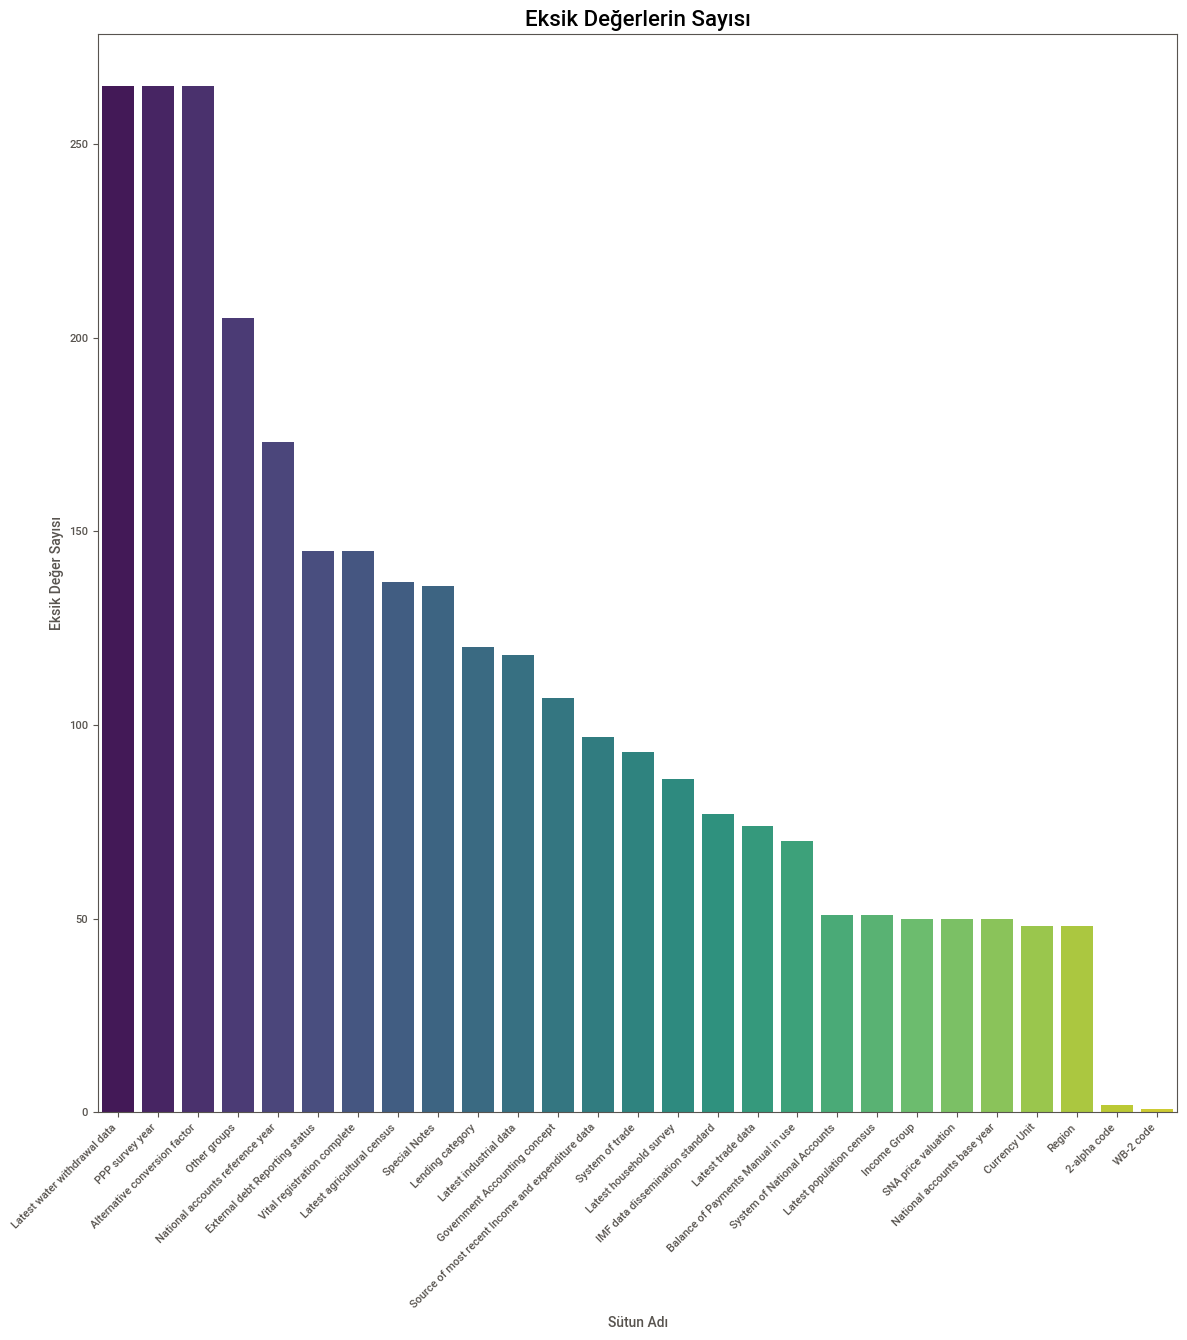

🚨 Etik Not: Yüksek oranda eksik veriye sahip sütunlar için uygulayacağınız (silme, doldurma) yöntemini ve bunun sonuçları nasıl etkileyeceğini raporunuzda belirtmeyi unutmayın (ASA B.1, B.2).


In [ ]:
# =========================================================
# 3. Eksik Veri Analizi Modülü
# =========================================================

def plot_missing_data(df):
    """Eksik değerlerin sayısını bar grafiği ile görselleştirir."""
    if df is None: return

    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

    if missing_data.empty:
        print("✅ Veri setinde eksik değer bulunmamaktadır.")
        return

    plt.figure(figsize=(12, max(6, len(missing_data) * 0.5))) # Grafik boyutunu dinamik ayarlar
    sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
    plt.title('Eksik Değerlerin Sayısı', fontsize=16)
    plt.xlabel('Sütun Adı')
    plt.ylabel('Eksik Değer Sayısı')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Etik Kontrol: Eksik Veri İşleme
    print("🚨 Etik Not: Yüksek oranda eksik veriye sahip sütunlar için uygulayacağınız (silme, doldurma) yöntemini ve bunun sonuçları nasıl etkileyeceğini raporunuzda belirtmeyi unutmayın (ASA B.1, B.2).")

# --- Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    plot_missing_data(wdicountry_df)


--- Sayısal Sütun Dağılımı: Latest trade data ---


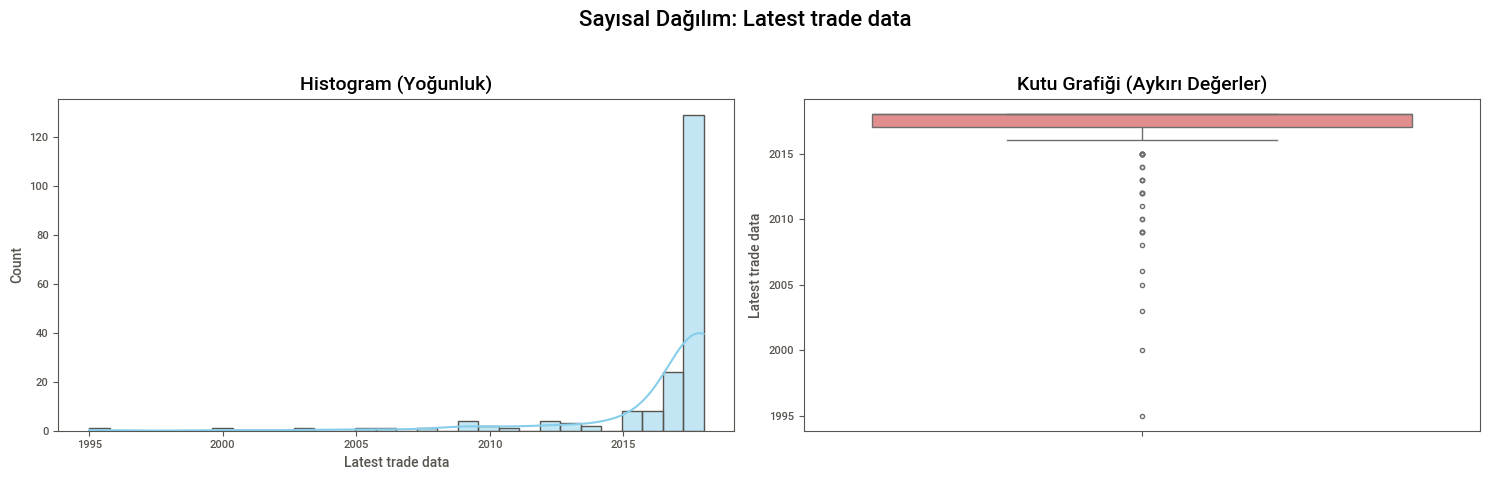

💡 Etik Not: 'Latest trade data' değişkenindeki dağılımı inceleyerek, farklı insan grupları veya coğrafi bölgeler arasındaki olası eşitsizlikleri veya varyasyonları (ASA B.7) göz önünde bulundurun.

--- Kategorik Sütun Dağılımı: Region ---


/tmp/ipython-input-4229766484.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")


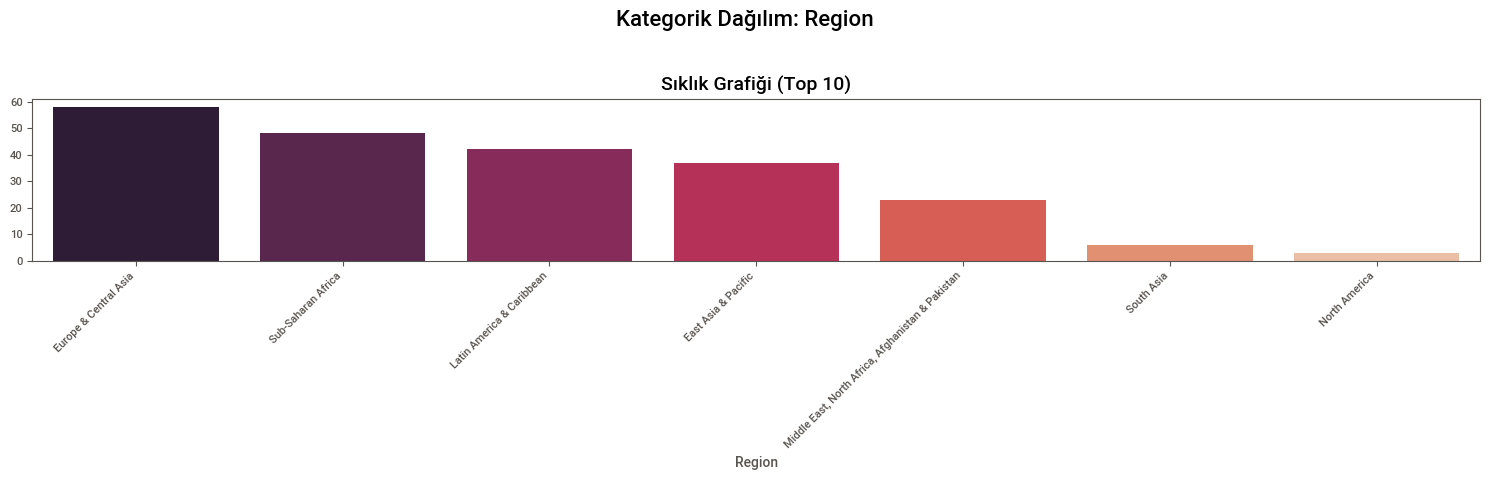

💡 Etik Not: 'Region' değişkenindeki dağılımı inceleyerek, farklı insan grupları veya coğrafi bölgeler arasındaki olası eşitsizlikleri veya varyasyonları (ASA B.7) göz önünde bulundurun.


In [ ]:
# =========================================================
# 4. Tek Değişkenli Dağılım Modülü
# =========================================================

def plot_univariate_distribution(df, column, is_numerical=True):
    """
    Tek bir sütunun dağılımını görselleştirir.
    Sayısal için Histogram ve Kutu Grafiği, Kategorik için Bar Grafiği kullanır.
    """
    if df is None: return

    # Hata Kontrolü: Sütunun varlığını kontrol etme
    if column not in df.columns:
        print(f"❌ HATA: '{column}' sütunu veri setinde bulunamadı. Lütfen sütun adını kontrol edin.")
        return

    plt.figure(figsize=(15, 5))

    if is_numerical:
        # Sayısal: Histogram (Dağılım) ve Kutu Grafiği (Aykırı Değerler)
        plt.suptitle(f"Sayısal Dağılım: {column}", fontsize=16)

        # Eksik değerleri temizleyerek çizim yap
        data_to_plot = df[column].dropna()
        if data_to_plot.empty:
            print(f"⚠️ Uyarı: '{column}' sütununda çizim yapmak için yeterli sayıda (NaN olmayan) veri yok.")
            return

        plt.subplot(1, 2, 1)
        sns.histplot(data_to_plot, kde=True, bins=30, color='skyblue')
        plt.title('Histogram (Yoğunluk)', fontsize=14)

        plt.subplot(1, 2, 2)
        sns.boxplot(y=data_to_plot, color='lightcoral')
        plt.title('Kutu Grafiği (Aykırı Değerler)', fontsize=14)

    else:
        # Kategorik: Bar Grafiği (Sıklık)
        plt.suptitle(f"Kategorik Dağılım: {column}", fontsize=16)
        # En çok tekrar eden 10 değeri al ve çubuk grafik çiz
        value_counts = df[column].value_counts().nlargest(10)
        sns.barplot(x=value_counts.index, y=value_counts.values, palette="rocket")
        plt.title('Sıklık Grafiği (Top 10)', fontsize=14)
        plt.xticks(rotation=45, ha='right')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Etik Kontrol: Varyasyonun Etkisi
    print(f"💡 Etik Not: '{column}' değişkenindeki dağılımı inceleyerek, farklı insan grupları veya coğrafi bölgeler arasındaki olası eşitsizlikleri veya varyasyonları (ASA B.7) göz önünde bulundurun.")


# --- DÜZELTİLMİŞ Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:

    # 1. Sayısal Dağılım Örneği (Gerçek Sütun Adı)
    numerical_col = 'Latest trade data' # Diğerleri: National accounts reference year, Latest industrial data
    print(f"\n--- Sayısal Sütun Dağılımı: {numerical_col} ---")
    plot_univariate_distribution(wdicountry_df, column=numerical_col, is_numerical=True)

    # 2. Kategorik Dağılım Örneği (Gerçek Sütun Adı)
    categorical_col = 'Region' # Diğer bir seçenek: Income Group
    print(f"\n--- Kategorik Sütun Dağılımı: {categorical_col} ---")
    plot_univariate_distribution(wdicountry_df, column=categorical_col, is_numerical=False)

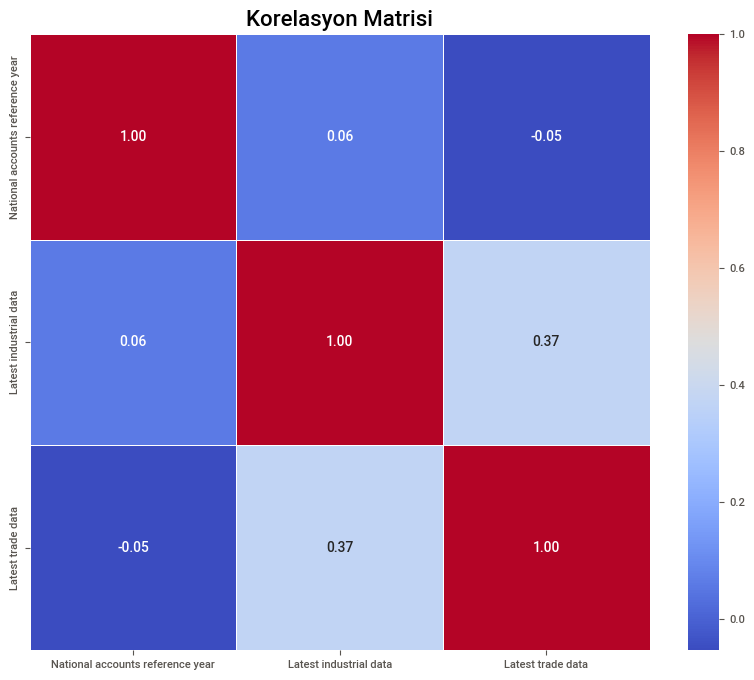

💡 Etik Not: Yüksek korelasyon (nedensellik değil, ilişki) bulduğunuzda, bu ilişkinin temelinde yatan varsayımlarınızı (ASA B.2) ve olası yanlış yorumlamaları paydaşlara açıklayın (ASA C.4).


In [ ]:
# =========================================================
# 5. İlişkisel Analiz Modülü (DÜZELTİLMİŞ)
# =========================================================

def plot_correlation_heatmap(df, numerical_cols):
    """Sayısal değişkenler arasındaki korelasyon matrisini görselleştirir."""
    if df is None: return

    # Sadece belirtilen sütunları al, NaN içeren satırları atarak corr hesapla
    # Sadece listede var olan sütunları seçmek, olası gelecekteki KeyErrors'ı da engeller.
    valid_cols = [col for col in numerical_cols if col in df.columns]

    if not valid_cols:
        print("❌ HATA: Seçilen sayısal sütunların hiçbiri veri setinde bulunamadı veya geçerli değil.")
        return

    df_corr = df[valid_cols].dropna()

    if df_corr.empty:
        print("❌ HATA: Seçilen sütunlarda korelasyon hesaplamak için yeterli (ortak) veri yok (tüm satırlar eksik değer içeriyor).")
        return

    corr_matrix = df_corr.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5, cbar=True)
    plt.title('Korelasyon Matrisi', fontsize=16)
    plt.show()

    # Etik Kontrol: İlişkilerin Yorumlanması
    print("💡 Etik Not: Yüksek korelasyon (nedensellik değil, ilişki) bulduğunuzda, bu ilişkinin temelinde yatan varsayımlarınızı (ASA B.2) ve olası yanlış yorumlamaları paydaşlara açıklayın (ASA C.4).")

# --- DÜZELTİLMİŞ Örnek Çalıştırma ---
if 'wdicountry_df' in locals() and wdicountry_df is not None:
    # Gerçek sayısal sütun adlarını kullanıyoruz:
    numerical_features = [
        'National accounts reference year',
        'Latest industrial data',
        'Latest trade data'
    ]
    plot_correlation_heatmap(wdicountry_df, numerical_features)

In [ ]:
# =========================================================
# 6. Sonuçların Etik Raporlanması ve Sınırlamalar (Güncel)
# =========================================================

print("\n--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---")
print("\nBu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular "
      "(veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak "
      "aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:")

print("\n* 🔹 BULGULARIN ÖZETİ (ASA B.2):")
print("  - Veri seti 265 satır ve 31 sütun içermektedir; başlıca kategorik değişkenler: Country Code, Short Name, "
      "Region, Income Group vb.")
print("  - Sayısal sütunlar (National accounts reference year, Latest industrial data, Latest trade data vb.) "
      "sınırlı veri içermekte ve bazı sütunlar tamamen eksik (NaN) değer içeriyor.")
print("  - Kategorik dağılımlar incelendi; Region sütunu farklı bölgeler arasındaki eşitsizlik veya varyasyonları gözlemlemeye olanak sağlıyor.")

print("\n* 🔹 ETİK İFŞAAT (ASA C.4):")
print("  - Sayısal verilerde yüksek oranda eksik değer bulunması, analizin derinliğini ve güvenilirliğini kısıtlamaktadır.")
print("  - Bazı sütunlar tamamen boş (PPP survey year, Alternative conversion factor, Latest water withdrawal data) ve analiz dışında bırakılmıştır.")
print("  - Eksik verilerin silinmesi veya doldurulması durumunda sonuçların nasıl etkileneceği raporda açıkça belirtilmelidir.")
print("  - Yüksek korelasyon veya ilişki bulgularında, nedensellik olmadığını ve olası yanlış yorumlamaları paydaşlara açıklayın (ASA B.2, C.4).")
print("  - Veri setinin kaynağı ve sınırlamaları belgelenmelidir (ASA B.1).")

print("\n* 🔹 KAPSAM BEYANI (ASA B.2):")
print("  - Çapraz tablolar veya dağılım analizlerinde Top N filtresi veya eksik veri nedeniyle bazı alt kümeler analiz dışında kalmıştır.")
print("  - Bu nedenle analiz, yalnızca mevcut ve yeterli veri bulunan örnekler üzerinden yorumlanmalıdır.")
print("  - Paydaşlara filtreleme ve eksik veri nedeniyle tüm veri seti genellemesi yapılamayacağı açıkça belirtilmelidir.")

print("\n💡 Not: Bu adım manuel yorum ve raporlama gerektirir; otomatik olarak üretilen görseller ve tablolar yalnızca rehber niteliğindedir. "
      "Paydaşlarla paylaşmadan önce etik ve metodolojik değerlendirmeyi tamamlayın.")



--- 6. Adım: Nihai Etik Raporlama ve Sınırlamalar ---

Bu aşamada, Adım 1'den Adım 5'e kadar elde edilen tüm görsel ve sayısal bulgular (veri özetleri, eksik değer kontrolü, dağılım grafikleri, çapraz tablolar) yorumlanarak aşağıdaki etik standartlara uygun bir rapor oluşturulmalıdır:

* 🔹 BULGULARIN ÖZETİ (ASA B.2):
  - Veri seti 265 satır ve 31 sütun içermektedir; başlıca kategorik değişkenler: Country Code, Short Name, Region, Income Group vb.
  - Sayısal sütunlar (National accounts reference year, Latest industrial data, Latest trade data vb.) sınırlı veri içermekte ve bazı sütunlar tamamen eksik (NaN) değer içeriyor.
  - Kategorik dağılımlar incelendi; Region sütunu farklı bölgeler arasındaki eşitsizlik veya varyasyonları gözlemlemeye olanak sağlıyor.

* 🔹 ETİK İFŞAAT (ASA C.4):
  - Sayısal verilerde yüksek oranda eksik değer bulunması, analizin derinliğini ve güvenilirliğini kısıtlamaktadır.
  - Bazı sütunlar tamamen boş (PPP survey year, Alternative conversion factor, Latest wa

Avrupa ve İsviçre mantıklı gözüküyor